In [ ]:
import os
import math
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from numpy import random
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score,roc_curve,auc, f1_score, roc_auc_score,confusion_matrix, accuracy_score, classification_report


In [ ]:
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from pylab import rcParams
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
train_df = pd.read_csv('exoTrain.csv')

In [ ]:
test_df = pd.read_csv('exoTest.csv')

In [ ]:
train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [ ]:
test_df.head(10)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
5,1,14.28,10.63,14.56,12.42,12.07,12.92,12.27,3.19,8.47,...,3.86,-4.06,-3.56,-1.13,-7.18,-4.78,-4.34,7.67,-0.33,-7.53
6,1,-150.48,-141.72,-157.60,-184.60,-164.89,-173.87,-162.91,-167.04,-172.76,...,7.15,5.16,-9.08,-39.11,-32.31,-8.40,-16.80,-8.03,-12.73,-11.41
7,1,-10.06,-12.78,-13.16,-9.81,-18.91,-20.33,-22.85,-19.17,-17.97,...,21.49,30.63,24.19,33.00,35.70,35.89,-33.44,-30.83,-33.00,-20.15
8,1,454.66,440.60,382.29,361.63,298.63,253.29,155.86,110.38,31.71,...,-56.78,-61.64,-120.32,-65.39,-126.75,-78.18,-184.39,-142.31,-113.12,-111.78
9,1,187.40,209.60,199.91,179.62,171.21,161.84,163.02,171.61,113.53,...,-23.75,-35.72,-21.93,-16.47,-21.84,-26.64,-13.90,17.03,4.36,2.91


In [ ]:
train_df.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [ ]:
test_df.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,...,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,1.008772,515.411351,738.046404,532.603246,739.618088,530.949807,729.591491,517.421404,720.723544,481.015211,...,60.027754,307.682825,88.976842,301.299895,105.121684,291.509561,256.656789,121.810035,224.806035,133.954544
std,0.093329,12592.950138,12622.940170,12545.065255,12591.933126,12512.976544,12572.187328,12454.094432,12525.496793,12397.610716,...,9528.594808,9588.586341,9497.373179,9611.024800,9611.076529,9654.581767,9362.719825,9487.642217,9483.948248,9700.731923
min,1.000000,-59421.000000,-14663.430000,-56580.000000,-10817.590000,-54545.000000,-7744.500000,-53580.000000,-6373.400000,-53832.000000,...,-89126.500000,-89432.070000,-89759.940000,-90182.630000,-90225.760000,-90595.000000,-86719.070000,-86911.500000,-87123.260000,-87476.940000
25%,1.000000,-22.230000,-22.912500,-22.985000,-18.662500,-20.980000,-21.245000,-22.675000,-22.200000,-22.685000,...,-9.602500,-12.842500,-15.222500,-14.350000,-17.370000,-18.272500,-24.000000,-27.360000,-36.855000,-29.475000
50%,1.000000,1.195000,0.410000,-1.125000,-0.880000,-1.495000,-2.650000,-4.330000,-3.910000,-3.890000,...,3.585000,3.795000,4.785000,3.910000,5.575000,7.150000,-4.385000,-4.995000,-5.135000,-3.785000
75%,1.000000,98.317500,89.710000,89.827500,73.257500,66.947500,45.147500,38.850000,37.150000,30.670000,...,23.445000,20.472500,25.582500,28.767500,27.455000,35.810000,17.755000,11.745000,12.265000,13.205000
max,2.000000,290882.500000,290653.500000,290554.000000,290486.500000,290289.000000,289982.500000,289197.500000,288520.500000,287404.500000,...,198420.000000,197888.500000,199639.000000,202007.000000,203730.500000,205924.000000,203193.000000,205050.000000,206884.500000,211488.500000


In [ ]:
categ = {2: 1,1: 0}
train_df.LABEL = [categ[item] for item in train_df.LABEL]
test_df.LABEL = [categ[item] for item in test_df.LABEL]

In [ ]:
train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


<Figure size 1000x600 with 0 Axes>

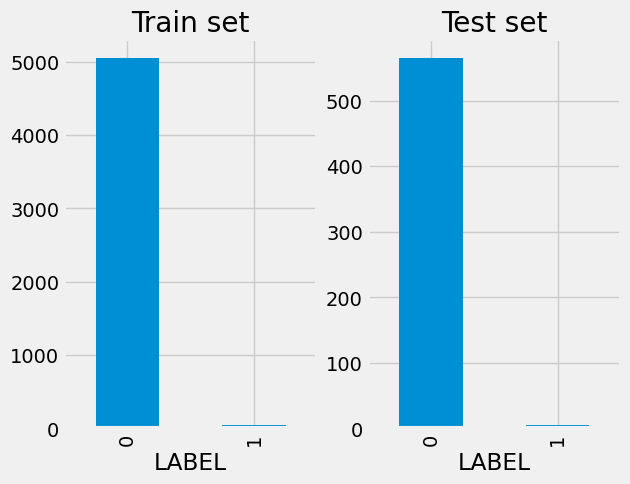

In [ ]:
figure(figsize=(10, 6))
fig, axes = plt.subplots(nrows=1, ncols=2)
ax1 = train_df['LABEL'].value_counts().plot(ax=axes[0],kind='bar')
ax2 = test_df['LABEL'].value_counts().plot(ax=axes[1],kind='bar')
ax1.title.set_text('Train set')
ax2.title.set_text('Test set')
plt.show()

In [ ]:
# Plotting some feature graphs of Non-Exoplanets
train_exo_y=train_df[train_df['LABEL'] >0 ]
train_exo_n=train_df[train_df['LABEL'] == 0]
x_train_res=train_exo_n.iloc[:,1:].T
y_train_res=train_exo_y.iloc[:,1:].T
x_train_res.head(1)
train_df['LABEL'].value_counts()

,count
LABEL,
0,5050
1,37


In [ ]:
# Doing the same for the test set
test_exo_y=test_df[test_df['LABEL'] >0 ]
test_exo_n=test_df[test_df['LABEL'] == 0]
x_test_res=test_exo_n.iloc[:,1:].T
y_test_res=test_exo_y.iloc[:,1:].T
x_test_res.head(1)
test_df['LABEL'].value_counts()

,count
LABEL,
0,565
1,5


In [ ]:
print(f'Label for planet 11 :  {train_df.LABEL[11]}')

Label for planet 11 :  1


In [ ]:
print(f'Label for planet 19 :  {train_df.LABEL[19]}')

Label for planet 19 :  1


In [ ]:
train_df.head(10)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
5,1,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16
6,1,9.34,49.96,33.30,9.63,37.64,20.85,4.54,22.42,10.11,...,-58.56,9.93,9.93,23.50,5.28,-0.44,10.90,-11.77,-9.25,-36.69
7,1,238.77,262.16,277.80,190.16,180.98,123.27,103.95,50.70,59.91,...,-72.48,31.77,31.77,53.48,27.88,95.30,48.86,-10.62,-112.02,-229.92
8,1,-103.54,-118.97,-108.93,-72.25,-61.46,-50.16,-20.61,-12.44,1.48,...,43.92,7.24,7.24,-7.45,-18.82,4.53,21.95,26.94,34.08,44.65
9,1,-265.91,-318.59,-335.66,-450.47,-453.09,-561.47,-606.03,-712.72,-685.97,...,3671.03,2249.28,2249.28,2437.78,2584.22,3162.53,3398.28,3648.34,3671.97,3781.91


In [ ]:
print(f'Label for planet 37 :  {train_df.LABEL[37]}')

Label for planet 37 :  0


In [ ]:
print(f'Label for planet 88 :  {train_df.LABEL[88]}')

Label for planet 88 :  0


In [ ]:
train_df['LABEL'].value_counts()

,count
LABEL,
0,5050
1,37


In [ ]:
fig = make_subplots(rows=4, cols=1,subplot_titles=("Flux variation of star 37", "Flux variation of star 100",
                                                   "Flux variation of star 200", "Flux variation of star 300"))
fig.add_trace(
    go.Scatter(y=x_train_res[37], x=y_train_res.index),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(y=x_train_res[100], x=y_train_res.index),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(y=x_train_res[200], x=y_train_res.index),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(y=x_train_res[300], x=y_train_res.index),
    row=4, col=1
)
fig.update_layout(height=1500, width=1200, title_text="Non Exoplanets Star examples",showlegend=False)
fig.show()

In [ ]:
fig = make_subplots(rows=4, cols=1,subplot_titles=("Flux variation of star 37", "Flux variation of star 100",
                                                   "Flux variation of star 200", "Flux variation of star 300"))
fig.add_trace(
    go.Scatter(y=x_train_res[37], x=y_train_res.index),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(y=x_train_res[100], x=y_train_res.index),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(y=x_train_res[200], x=y_train_res.index),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(y=x_train_res[300], x=y_train_res.index),
    row=4, col=1
)
fig.update_layout(height=1500, width=1200, title_text="Non Exoplanets Star examples",showlegend=False)
fig.show()

In [ ]:
fig = make_subplots(rows=4, cols=1,subplot_titles=("Flux variation of star 37", "Flux variation of star 100",
                                                   "Flux variation of star 200", "Flux variation of star 300"))
fig.add_trace(
    go.Scatter(y=x_train_res[37], x=y_train_res.index),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(y=x_train_res[100], x=y_train_res.index),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(y=x_train_res[200], x=y_train_res.index),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(y=x_train_res[300], x=y_train_res.index),
    row=4, col=1
)
fig.update_layout(height=1500, width=1200, title_text="Non Exoplanets Star examples",showlegend=False)
fig.show()

In [ ]:
fig = make_subplots(rows=4, cols=1,subplot_titles=("Flux variation of star 37", "Flux variation of star 100",
                                                   "Flux variation of star 200", "Flux variation of star 300"))
fig.add_trace(
    go.Scatter(y=x_train_res[37], x=y_train_res.index),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(y=x_train_res[100], x=y_train_res.index),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(y=x_train_res[200], x=y_train_res.index),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(y=x_train_res[300], x=y_train_res.index),
    row=4, col=1
)
fig.update_layout(height=1500, width=1200, title_text="Non Exoplanets Star examples",showlegend=False)
fig.show()

In [ ]:
fig = make_subplots(rows=4, cols=1,subplot_titles=("Flux variation of star 3", "Flux variation of star 16",
                                                   "Flux variation of star 23", "Flux variation of star 29"))
fig.add_trace(
    go.Scatter(y=train_df.iloc[3, 1:], x=train_df.columns[1:]),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(y=train_df.iloc[16, 1:], x=train_df.columns[1:]),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(y=train_df.iloc[23, 1:], x=train_df.columns[1:]),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(y=train_df.iloc[29, 1:], x=train_df.columns[1:]),
    row=4, col=1
)
fig.update_layout(height=1500, width=1200, title_text="Star Examples",showlegend=False)
fig.show()

In [ ]:
x_train = train_df.drop(["LABEL"],axis=1)
y_train = train_df["LABEL"]
x_test = test_df.drop(["LABEL"],axis=1)
y_test = test_df["LABEL"]

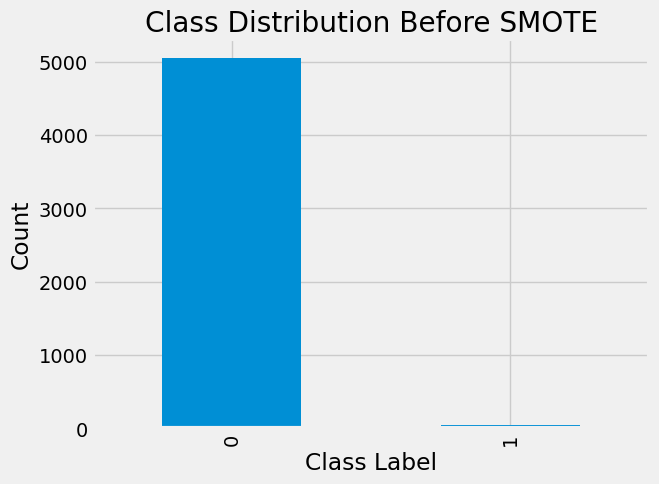

In [ ]:
y_train.value_counts().plot(kind='bar')
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.title("Class Distribution Before SMOTE")
plt.show()

In [ ]:
print(train_df.isnull().sum().sum())

0


In [ ]:
print(train_df.isnull().sum())

LABEL        0
FLUX.1       0
FLUX.2       0
FLUX.3       0
FLUX.4       0
            ..
FLUX.3193    0
FLUX.3194    0
FLUX.3195    0
FLUX.3196    0
FLUX.3197    0
Length: 3198, dtype: int64


In [ ]:
print((train_df.isnull().sum()).unique())

[0]


In [ ]:
# Dropping rows with missing values
# train_df.dropna(inplace=True)

In [ ]:
model = SMOTE()
x_train_res,y_train_res = model.fit_resample(x_train,y_train)
y_train_res = y_train_res.astype('int')

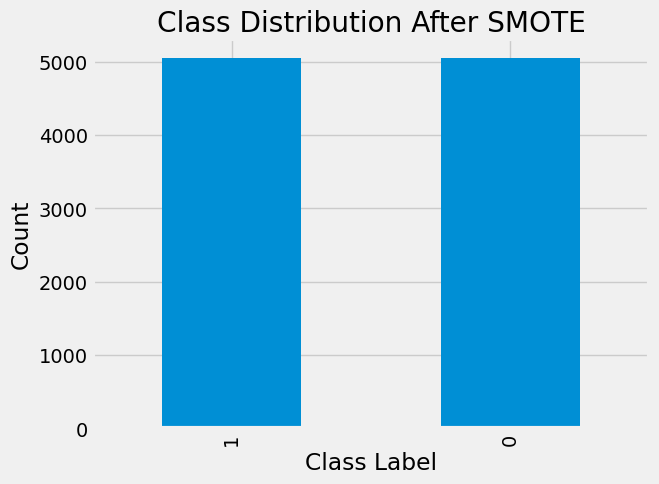

In [ ]:
y_train_res.value_counts().plot(kind='bar')
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.title("Class Distribution After SMOTE")
plt.show()

In [ ]:
x_train_res.shape, x_test.shape, y_train_res.shape, y_test.shape

((10100, 3197), (570, 3197), (10100,), (570,))

In [ ]:
y_train_res.value_counts()

,count
LABEL,
1,5050
0,5050


In [ ]:
y_train_res.head()

,LABEL
0,1
1,1
2,1
3,1
4,1


In [ ]:
y_train_res.unique()

array([1, 0])

In [ ]:
y_train_res.value_counts()

,count
LABEL,
1,5050
0,5050


In [ ]:
x_train_res = normalized = normalize(x_train_res)
x_test = normalize(x_test)

In [ ]:
x_train.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [ ]:
print(x_train_res[:5])

[[ 0.01030876  0.00920594  0.00220784 ...  0.00674656  0.000558
  -0.00434319]
 [-0.01137337 -0.00989612 -0.01712441 ...  0.00188971  0.0046804
   0.00583002]
 [ 0.03341091  0.03361665  0.03222474 ... -0.00181344 -0.00439214
  -0.00606382]
 [ 0.05588873  0.05946093  0.05175167 ... -0.00296286 -0.00296971
   0.00239288]
 [-0.04807698 -0.04831059 -0.04858675 ... -0.01670217 -0.01788064
  -0.02216853]]


In [ ]:
x_train_res = pd.DataFrame(x_train_res)
display(x_train_res.head())

,0,1,2,3,4,5,6,7,8,9,...,3187,3188,3189,3190,3191,3192,3193,3194,3195,3196
0,0.010309,0.009206,0.002208,-0.002964,-0.004345,-0.013699,-0.014849,-0.010575,-0.008775,-0.017594,...,-0.008575,-0.011220,-0.011220,0.002760,0.005335,0.010165,0.004319,0.006747,0.000558,-0.004343
1,-0.011373,-0.009896,-0.017124,-0.011727,-0.023200,-0.021299,-0.025318,-0.024961,-0.024563,-0.021465,...,-0.000959,-0.009422,-0.009422,-0.007281,-0.001422,0.000222,-0.003423,0.001890,0.004680,0.005830
2,0.033411,0.033617,0.032225,0.031170,0.028632,0.029231,0.029137,0.030510,0.027384,0.030384,...,-0.004497,0.000835,0.000835,-0.001875,-0.001310,0.000317,-0.000740,-0.001813,-0.004392,-0.006064
3,0.055889,0.059461,0.051752,0.051029,0.054386,0.053523,0.055172,0.053285,0.053475,0.055343,...,0.000977,-0.000638,-0.000638,0.005144,0.003428,-0.002169,-0.001501,-0.002963,-0.002970,0.002393
4,-0.048077,-0.048311,-0.048587,-0.047551,-0.045921,-0.044919,-0.043350,-0.044408,-0.042969,-0.042157,...,-0.025809,-0.017441,-0.017441,-0.015512,-0.019269,-0.019042,-0.017356,-0.016702,-0.017881,-0.022169


Validation accuracy of Logistic Regression is 0.980701754385965

Classification report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       565
           1       0.00      0.00      0.00         5

    accuracy                           0.98       570
   macro avg       0.50      0.49      0.50       570
weighted avg       0.98      0.98      0.98       570



Text(0.5, 1.0, 'CONFUSION MATRIX')

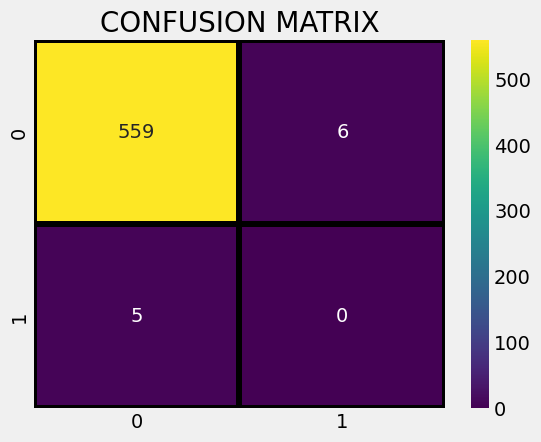

In [ ]:
#Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(x_train_res,y_train_res)
prediction=lr_model.predict(x_test)
print('Validation accuracy of Logistic Regression is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))
#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

Validation accuracy of Decision Tree is 0.8543859649122807

Classification report :
               precision    recall  f1-score   support

           0       0.99      0.86      0.92       565
           1       0.00      0.00      0.00         5

    accuracy                           0.85       570
   macro avg       0.49      0.43      0.46       570
weighted avg       0.98      0.85      0.91       570



Text(0.5, 1.0, 'CONFUSION MATRIX')

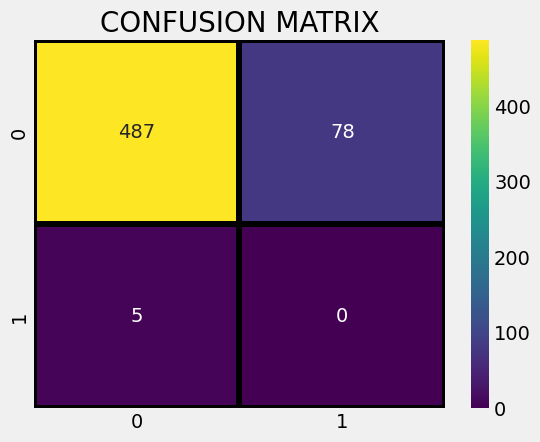

In [ ]:
#Decision Tree
ds_model = DecisionTreeClassifier(max_depth=5, random_state=13)
ds_model.fit(x_train_res,y_train_res)
prediction=ds_model.predict(x_test)
print('Validation accuracy of Decision Tree is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))
#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

Validation accuracy of Random Forest is 0.9912280701754386

Classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



Text(0.5, 1.0, 'CONFUSION MATRIX')

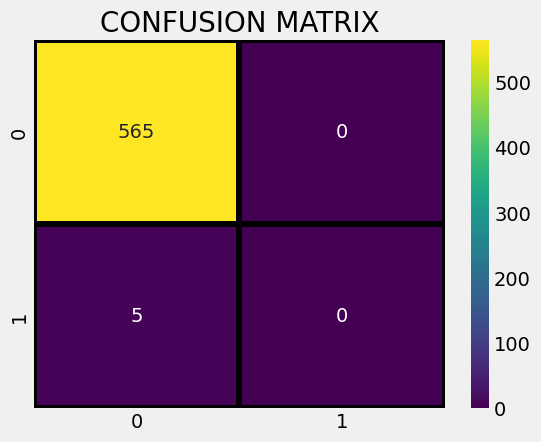

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train_res,y_train_res)
prediction=rf_classifier.predict(x_test)
print('Validation accuracy of Random Forest is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))
#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)